In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('weatherAUS_2.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [4]:
df = df.rename(columns={'RainToday':'RainYesterday',      
                        'RainTomorrow': 'RainToday'  
                       })

In [5]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]

In [6]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,100.0,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,100.0,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,85.0,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,99.0,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No


In [7]:
def date_to_season(date):
    month = date.month
    if(month ==12) or (month == 1) or (month==2):
            return 'Summer'
    elif(month ==3) or (month ==4) or (month ==5):
            return 'Autumn'
    elif (month ==6) or (month==7) or (month ==8):
            return 'Winter'
    elif (month ==9) or (month==10) or (month ==11):
            return 'Spring'

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,100.0,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,100.0,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,85.0,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,99.0,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No


In [10]:
df['Season'] = df['Date'].apply(date_to_season)

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,2017-06-20,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,2017-06-22,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,2017-06-23,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,2017-06-24,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


In [88]:
X = df.drop(columns='RainToday', axis=1)
y = df['RainToday']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [90]:
X_train[0:5]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,Season
64965,2011-02-14,MelbourneAirport,10.6,23.9,0.0,4.4,12.0,S,31.0,SSE,...,78.0,56.0,1024.6,1022.6,2.0,1.0,16.1,21.9,No,Summer
78127,2009-05-19,Watsonia,5.3,19.7,0.2,1.0,6.3,ENE,13.0,ENE,...,99.0,48.0,1022.8,1019.5,7.0,7.0,6.9,19.6,No,Autumn
78948,2011-09-17,Watsonia,5.0,25.4,0.2,3.8,8.8,N,57.0,E,...,95.0,35.0,1013.6,1005.5,1.0,6.0,12.2,24.1,No,Spring
68513,2012-03-05,Melbourne,15.5,22.5,17.0,6.8,6.7,SW,39.0,WSW,...,67.0,58.0,1017.8,1019.1,3.0,6.0,16.9,21.2,Yes,Autumn
66431,2015-05-19,MelbourneAirport,11.1,15.4,0.2,4.4,0.7,N,61.0,N,...,82.0,74.0,1012.7,1008.7,7.0,7.0,12.7,14.9,No,Autumn


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7557 non-null   datetime64[ns]
 1   Location       7557 non-null   object        
 2   MinTemp        7557 non-null   float64       
 3   MaxTemp        7557 non-null   float64       
 4   Rainfall       7557 non-null   float64       
 5   Evaporation    7557 non-null   float64       
 6   Sunshine       7557 non-null   float64       
 7   WindGustDir    7557 non-null   object        
 8   WindGustSpeed  7557 non-null   float64       
 9   WindDir9am     7557 non-null   object        
 10  WindDir3pm     7557 non-null   object        
 11  WindSpeed9am   7557 non-null   float64       
 12  WindSpeed3pm   7557 non-null   float64       
 13  Humidity9am    7557 non-null   float64       
 14  Humidity3pm    7557 non-null   float64       
 15  Pressure9am    7557 n

In [92]:
numeric_features = X_train.select_dtypes(include=['float64']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [93]:
categorical_features

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainYesterday',
 'Season']

In [94]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [95]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [97]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [98]:
from sklearn.model_selection import  GridSearchCV, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [99]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)  


In [100]:
y_train

64965     No
78127     No
78948     No
68513     No
66431    Yes
        ... 
78380     No
78415     No
78605     No
65081    Yes
80652     No
Name: RainToday, Length: 6045, dtype: object

In [101]:
grid_search.fit(X_train, y_train
               )

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [87]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_ta = label_encoder.fit_transform(target_labels)

'continuous'

In [102]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


 {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.85


In [103]:
test_score = grid_search.score(X_test, y_test)  
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.85


In [104]:
y_pred = grid_search.predict(X_test)


In [105]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      1168
         Yes       0.76      0.53      0.62       344

    accuracy                           0.85      1512
   macro avg       0.82      0.74      0.77      1512
weighted avg       0.85      0.85      0.84      1512



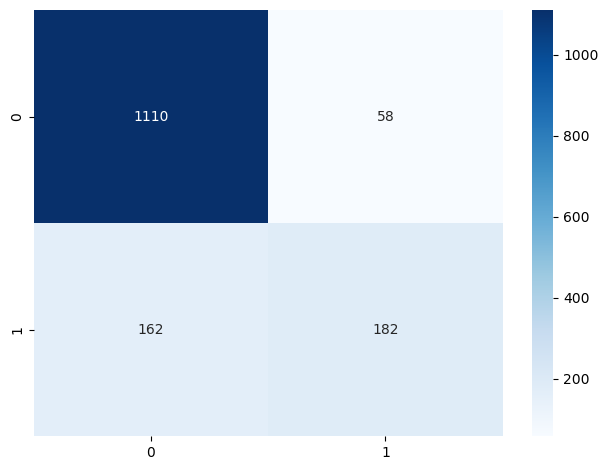

In [110]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            )
plt.tight_layout()
plt.show()

In [108]:
%pip install seaborn